<a href="https://colab.research.google.com/github/IA2021UR/entregable-1-joferne/blob/main/1_analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS** 

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**2. CARGA DE DATOS** 

In [2]:
!unzip ia2021.zip

Archive:  ia2021.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**3. ANÁLISIS DE DATOS** 

En primer lugar para familiarizarnos con el dataset vamos a observar cómo es el dataset. Para ello vamos a ver sus primeras filas.

In [4]:
print(df_train.head())
print(df_test.head())

         SL      EEG  BP   HR  CIRCULATION  ACTIVITY
0   4019.64 -1600.00  13   79          317         3
1   2191.03 -1146.08  20   54          165         2
2   2787.99 -1263.38  46   67          224         2
3   9545.98 -2848.93  26  138          554         4
4  14148.80 -2381.15  85  120          809         4
         SL      EEG  BP   HR  CIRCULATION
0  28146.00 -3670.00  29  194         1521
1  12064.90 -1796.28   8  105          765
2   3041.75 -1220.95  35   71          249
3   9918.52 -2570.00  44  154          587
4  26464.00 -3133.00  34  161         1523


¿Cuál es el tamaño del dataset? ¿Qué columnas tiene?

In [5]:
print('df_train shape: ' + str(df_train.shape) + ' || ' + 'df_test shape: ' + str(df_test.shape))

df_train shape: (11999, 6) || df_test shape: (4383, 5)


In [6]:
print('df_train columnas: ' + str(df_train.columns))
print('df_test: ' + str(df_test.columns))

df_train columnas: Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')
df_test: Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION'], dtype='object')


- El conjunto train_set tiene 6 columnas: 'SL', 'EEG', 'BP', 'HR', 'CIRCULATION' y 'ACTIVITY'.
- El conjunto test_set tiene 5 columnas: 'SL', 'EEG', 'BP', 'HR' y 'CIRCULATION'. 

Por tanto el objetivo final será crear un modelo que consiga predecir la Actividad que está realizando.

Observamos la media, desviación y los rangos intercuartílicos y la información de ambos datasets.

In [7]:
df_train.describe()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
count,1.199900e+04,1.199900e+04,11999.000000,11999.000000,11999.000000,11999.000000
mean,7.566022e+04,-2.229112e+04,58.483874,212.415535,2900.695058,2.368947
std,1.266692e+05,1.284765e+05,48.146245,130.375027,3789.822123,1.736608
min,4.222420e+01,-3.396800e+06,0.000000,33.000000,5.000000,0.000000
25%,1.006220e+04,-5.889500e+03,25.000000,120.000000,587.000000,0.000000
50%,3.243530e+04,-3.498580e+03,45.000000,180.000000,1626.000000,3.000000
75%,8.156320e+04,-2.290000e+03,79.000000,271.000000,3539.000000,4.000000
max,2.352450e+06,1.410000e+06,533.000000,981.000000,41819.000000,5.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL           11999 non-null  float64
 1   EEG          11999 non-null  float64
 2   BP           11999 non-null  int64  
 3   HR           11999 non-null  int64  
 4   CIRCULATION  11999 non-null  int64  
 5   ACTIVITY     11999 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 562.6 KB


In [9]:
df_test.describe()

,SL,EEG,BP,HR,CIRCULATION
count,4.383000e+03,4.383000e+03,4383.000000,4383.000000,4383.000000
mean,7.464319e+04,-2.733101e+04,57.613735,209.131873,2876.947753
std,1.299711e+05,2.288913e+05,48.692051,128.761571,3923.458899
min,4.690760e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,9.950030e+03,-5.826810e+03,25.000000,118.000000,584.500000
50%,2.991810e+04,-3.413000e+03,43.000000,179.000000,1521.000000
75%,7.942745e+04,-2.297935e+03,77.000000,262.000000,3466.000000
max,2.426140e+06,1.440000e+05,435.000000,986.000000,52210.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL           4383 non-null   float64
 1   EEG          4383 non-null   float64
 2   BP           4383 non-null   int64  
 3   HR           4383 non-null   int64  
 4   CIRCULATION  4383 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 171.3 KB


¿Cómo quedaría el dataset ordenado ascendentemente por actividad?

In [11]:
df_train_ordenada = df_train.sort_values(by=['ACTIVITY'],ascending=[True])
df_train_ordenada

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
3348,138485.0,-7096.24,187,315,5630,0
3723,134450.0,-5623.00,57,357,5958,0
3725,223021.0,-8267.00,68,359,8597,0
3727,139734.0,-10685.00,28,273,2610,0
3729,76018.0,-6502.00,61,260,3294,0
...,...,...,...,...,...,...
1317,146238.0,-5130.00,60,315,5844,5
1318,35489.8,-4235.18,94,208,1691,5
5245,48695.9,-6060.00,26,215,2188,5
5241,12591.9,-2667.33,61,130,694,5


Voy a tratar de mostrar una comparativa de la media y la desviación del df_train vs df_test.

In [12]:
print('SL train: ' + str(df_train['SL'].mean()) + ' || SL test: ' + str(df_test['SL'].mean()))

print('EEG train: ' + str(df_train['EEG'].mean()) + ' || EEG test: ' + str(df_test['EEG'].mean()))

print('BP train: ' + str(df_train['BP'].mean()) + ' || BP test: ' + str(df_test['BP'].mean()))

print('HR train: ' + str(df_train['HR'].mean()) + ' || HR test: ' + str(df_test['HR'].mean()))

print('CIRCULATION train: ' + str(df_train['CIRCULATION'].mean()) + ' || CIRCULATION test: ' + str(df_test['CIRCULATION'].mean()))

SL train: 75660.22427377278 || SL test: 74643.1870016883
EEG train: -22291.11888351696 || EEG test: -27331.01009582476
BP train: 58.48387365613801 || BP test: 57.61373488478211
HR train: 212.41553462788565 || HR test: 209.13187314624687
CIRCULATION train: 2900.6950579214936 || CIRCULATION test: 2876.9477526808123


In [13]:
df_train.apply(np.mean)

SL             75660.224274
EEG           -22291.118884
BP                58.483874
HR               212.415535
CIRCULATION     2900.695058
ACTIVITY           2.368947
dtype: float64

In [14]:
df_test.apply(np.mean)

SL             74643.187002
EEG           -27331.010096
BP                57.613735
HR               209.131873
CIRCULATION     2876.947753
dtype: float64

In [15]:
df_train.apply(np.std)

SL             126663.882980
EEG            128471.185992
BP                 48.144239
HR                130.369595
CIRCULATION      3789.664197
ACTIVITY            1.736536
dtype: float64

In [16]:
df_test.apply(np.std)

SL             129956.316341
EEG            228865.163555
BP                 48.686496
HR                128.746881
CIRCULATION      3923.011297
dtype: float64

¿Cuál es la media de los elementos del descriptor 'SL' que desarrollan la actividad 5?

In [17]:
df_train[df_train['ACTIVITY'] == 5]['SL'].mean()

51402.210873247386

Voy a añadir una columna llamada 'Localizador' que sirva para identificar una fila en concreto ya que nos será útil más adelante.

In [18]:
df_train['Localizador'] = [i for i in range(0,df_train.shape[0])]
df_train.head()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY,Localizador
0,4019.64,-1600.00,13,79,317,3,0
1,2191.03,-1146.08,20,54,165,2,1
2,2787.99,-1263.38,46,67,224,2,2
3,9545.98,-2848.93,26,138,554,4,3
4,14148.80,-2381.15,85,120,809,4,4


Por último vamos a visualizar los datos. Para ello le vamos a aplicar una reducción de dimensionalidad PCA.

In [20]:
pca = PCA(n_components=2).fit(df_train)
data_r = pca.transform(df_train)

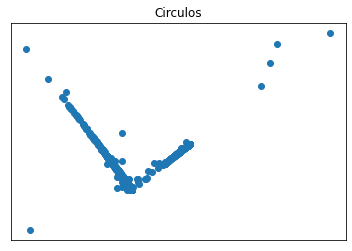

In [21]:
plt.figure()
plt.title('Circulos')
plt.scatter(data_r[:,0], data_r[:,1])
plt.xticks(())
plt.yticks(())
plt.show()